In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 데이터 로드
events = pd.read_csv('/content/drive/MyDrive/events.csv')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#데이터 기본 정보 확인

In [ ]:
# info
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [ ]:
# head
events.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [ ]:
# describe
events.describe(include='all')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,885129,885129,8.851290e+05,8.851290e+05,648910,672765,885129.000000,8.851290e+05,884964
unique,845041,3,NaN,NaN,107,999,NaN,NaN,490398
top,2021-02-04 21:48:32 UTC,view,NaN,NaN,computers.components.videocards,asus,NaN,NaN,nFlhu5QzOd
freq,18,793748,NaN,NaN,116717,27706,NaN,NaN,572
mean,NaN,NaN,1.906621e+06,2.144423e+18,NaN,NaN,146.328713,1.515916e+18,NaN
std,NaN,NaN,1.458708e+06,6.165105e+14,NaN,NaN,296.807683,3.554165e+07,NaN
min,NaN,NaN,1.020000e+02,2.144416e+18,NaN,NaN,0.220000,1.515916e+18,NaN
25%,NaN,NaN,6.988030e+05,2.144416e+18,NaN,NaN,26.460000,1.515916e+18,NaN
50%,NaN,NaN,1.452883e+06,2.144416e+18,NaN,NaN,65.710000,1.515916e+18,NaN
75%,NaN,NaN,3.721194e+06,2.144416e+18,NaN,NaN,190.490000,1.515916e+18,NaN


In [ ]:
# 컬럼별 고유 값 확인
for column in events.columns:
    print(f"Unique values in {column}: {events[column].nunique()}")

Unique values in event_time: 845041
Unique values in event_type: 3
Unique values in product_id: 53453
Unique values in category_id: 718
Unique values in category_code: 107
Unique values in brand: 999
Unique values in price: 12422
Unique values in user_id: 407283
Unique values in user_session: 490398


#결측치 확인

* user_session의 값이 NaN값인 row는 165개로 drop하는 것이 필요함

In [ ]:
# null값 확인
null_counts = events.isnull().sum()
print(null_counts)

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64


In [ ]:
# user_session null 데이터
events[events['user_session'].isnull()]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2257,2020-09-24 23:47:04 UTC,view,1715896,2144415926731145430,computers.components.network_adapter,NaN,17.40,1515915625496120859,NaN
6872,2020-09-26 05:14:39 UTC,view,3791351,2144415926966026460,computers.components.cpu,amd,204.29,1515915625519884058,NaN
7898,2020-09-26 10:58:24 UTC,view,1785245,2144415925011480748,stationery.cartrige,canon,43.11,1515915625495954428,NaN
11782,2020-09-27 11:59:41 UTC,view,1153724,2144415921169498184,NaN,zte,6.29,1515915625520228004,NaN
24461,2020-09-30 07:31:01 UTC,view,1559260,2144415928845074703,computers.notebook,NaN,16.83,1515915625397674009,NaN
...,...,...,...,...,...,...,...,...,...
796271,2021-02-13 10:49:04 UTC,view,4154439,2144415922587172973,electronics.telephone,NaN,12.22,1515915625584300834,NaN
808622,2021-02-15 12:23:22 UTC,view,630863,2144415925011480748,stationery.cartrige,nv-print,17.62,1515915625605766062,NaN
808625,2021-02-15 12:23:39 UTC,view,630863,2144415925011480748,stationery.cartrige,nv-print,17.62,1515915625605766062,NaN
808626,2021-02-15 12:23:45 UTC,view,630863,2144415925011480748,stationery.cartrige,nv-print,17.62,1515915625605766062,NaN


In [ ]:
# user_session이 null값인 user_id 수
events[events['user_session'].isnull()]['user_id'].nunique()

140

#데이터 전처리

* event_time dtype 변환

In [ ]:
# event_time dtype 변환(to_datetime)
events.insert(loc=0, column='events_time_dtype', value=pd.to_datetime(events['event_time']))

In [ ]:
# event_time을 date로
events['events_date'] = events['events_time_dtype'].dt.date
events.head()

,events_time_dtype,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,events_date
0,2020-09-24 11:57:06+00:00,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24
1,2020-09-24 11:57:26+00:00,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24
2,2020-09-24 11:57:27+00:00,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24
3,2020-09-24 11:57:33+00:00,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24
4,2020-09-24 11:57:36+00:00,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24


In [ ]:
# main category 컬럼 추가

events.insert(loc=5, column='main_category', value=category_level)
events.head()

,events_time_dtype,event_time,event_type,product_id,category_id,main_category,category_code,brand,price,user_id,user_session,events_date
0,2020-09-24 11:57:06+00:00,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24
1,2020-09-24 11:57:26+00:00,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24
2,2020-09-24 11:57:27+00:00,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24
3,2020-09-24 11:57:33+00:00,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24
4,2020-09-24 11:57:36+00:00,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24


#EDA

In [ ]:
# event_type의 value_counts()-> kaggle 설명과 달리 type은 3가지로 나타남
events['event_type'].value_counts()

event_type
view        793748
cart         54035
purchase     37346
Name: count, dtype: int64

In [ ]:
# product_id value_counts
events['product_id'].value_counts()

product_id
1821813    14563
4099645     7089
3791351     6907
3829355     5762
1785245     5118
           ...  
303610         1
4099852        1
234297         1
429622         1
3721183        1
Name: count, Length: 53453, dtype: int64

In [ ]:
# main category

category_level = events['category_code'].str.split('.').str.get(0)
category_level.value_counts()

category_code
computers       316954
electronics     171108
stationery       42984
appliances       41087
auto             35433
construction     31067
furniture         3365
country_yard      3142
accessories       2080
medicine           713
kids               372
jewelry            255
sport              232
apparel            118
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

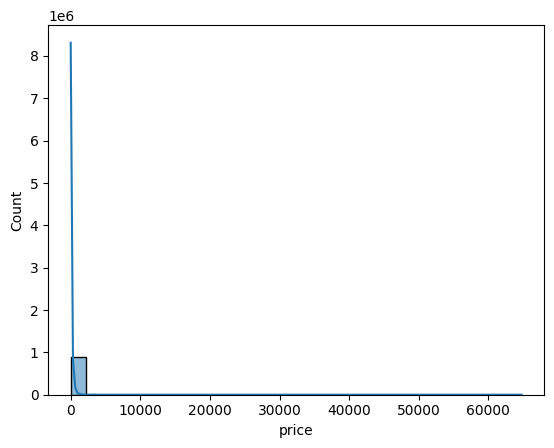

In [ ]:
# price 분포

sns.histplot(events['price'], bins=30, kde=True)

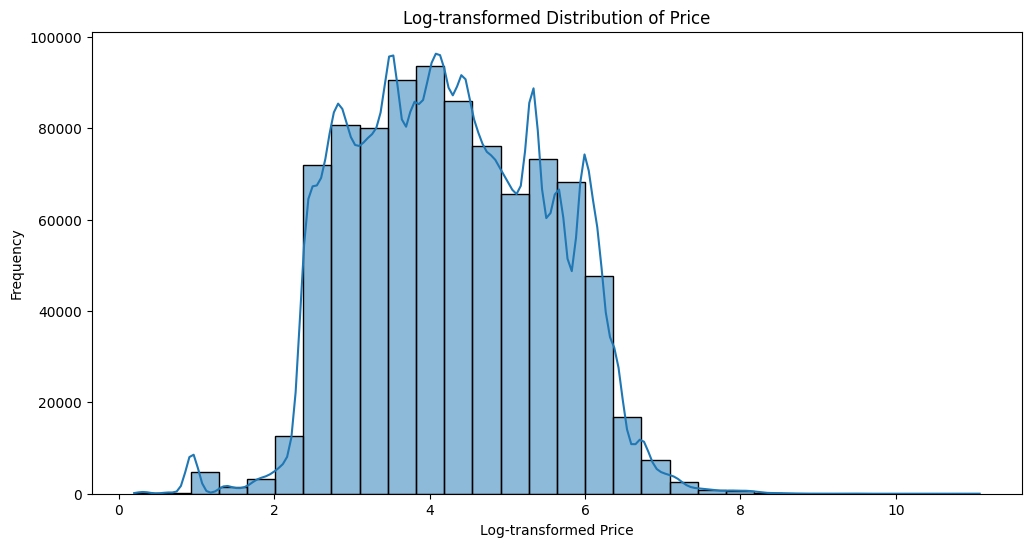

In [ ]:
# 로그 변환된 price 분포

plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(events['price']), bins=30, kde=True)
plt.title('Log-transformed Distribution of Price')
plt.xlabel('Log-transformed Price')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='events_time_dtype'>

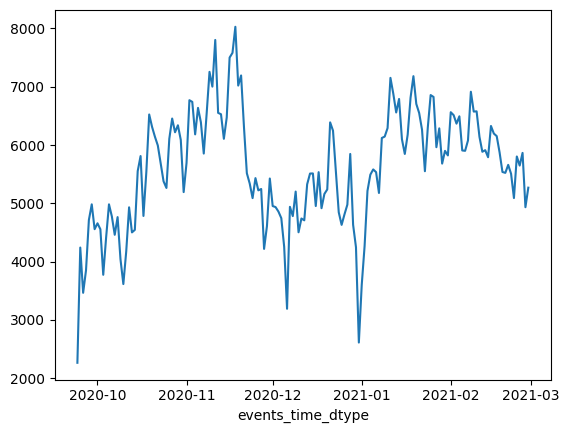

In [ ]:
# 일별 발생 이벤트량

daily_events = events.groupby('events_time_dtype').size()
sns.lineplot(daily_events)

#user_session 데이터 확인

- RFM
    - user_id별 user_session 갯수 → Frequency 확인 가능
    - user_id별 마지막 user_session 시간 → Recency 확인 가능
- 고객 세분화
    - user_session의 유지시간, 한 세션 내 발생 이벤트 분석
- 이탈 분석
    - 세션의 마지막 로그의 event_type 확인

* user_session별 지속시간

In [ ]:
session_duration = events.groupby('user_session')['events_time_dtype'].agg(['min', 'max'])
session_duration['duration'] = session_duration['max'] - session_duration['min']
session_duration.head()

,min,max,duration
user_session,,,
000AMhYaQu,2021-01-31 20:27:14+00:00,2021-01-31 20:27:14+00:00,0 days 00:00:00
000c34fa-991f-442a-8e07-8c472269bec6,2020-09-30 17:52:02+00:00,2020-09-30 17:52:02+00:00,0 days 00:00:00
001HttdHUk,2021-01-09 23:35:49+00:00,2021-01-09 23:35:49+00:00,0 days 00:00:00
001P7lK0Pt,2020-11-06 01:25:30+00:00,2020-11-06 01:25:43+00:00,0 days 00:00:13
001RxUtFJa,2020-12-29 04:50:33+00:00,2020-12-29 04:50:33+00:00,0 days 00:00:00


* user_session별 발생 이벤트

In [ ]:
session_events = events.groupby('user_session')['event_type'].value_counts().unstack().fillna(0)
session_events.head(30)

event_type,cart,purchase,view
user_session,,,
000AMhYaQu,0.0,0.0,1.0
000c34fa-991f-442a-8e07-8c472269bec6,0.0,0.0,1.0
001HttdHUk,0.0,0.0,1.0
001P7lK0Pt,0.0,0.0,2.0
001RxUtFJa,0.0,0.0,1.0
002DmERG1w,0.0,0.0,1.0
003QqC0jk0,0.0,0.0,1.0
003pEktS1X,0.0,0.0,2.0
003syqud5i,0.0,0.0,1.0


* 재방문이 있는 user_id

In [ ]:
# user_id별 user_session의 개수 계산
session_counts = events.groupby('user_id')['user_session'].nunique()

# user_session 개수가 0인 user_id 필터링
filtered_users = session_counts[session_counts >= 2]
filtered_users.size

# # 필터링된 user_id를 가진 데이터 추출
# filtered_events = events[events['user_id'].isin(filtered_users)]

# filtered_events.size

52347

그로스 해킹(g.h)

**Acquisition**

- 어떻게 데려올 것인가(g.h) → 해당 데이터 없음
- DAU

**Activation**

- 코호트별 전환율(g.h) → 코호트 구분 기준 : 첫 방문일 기준
- 상품조회 수, 장바구니 담기 수, 구매 수

**Retention**

- 코호트별 리텐션(g.h)
- 전환/이탈 데이터

**Revenue**

- 전체매출, LTV, ARPPU(결제자 인당 평균 매출)